In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
path_to_dataset = '/content/gdrive/MyDrive/ECE 5424 ML/Final_Project/Dataset/EEG_data.csv'
df = pd.read_csv(path_to_dataset)

In [ ]:
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [ ]:
sns.pairplot(df, hue="SubjectID", size=3)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
x = df[ df['SubjectID'] == 0.0]

In [ ]:
print(x.to_string()) 

In [ ]:
# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

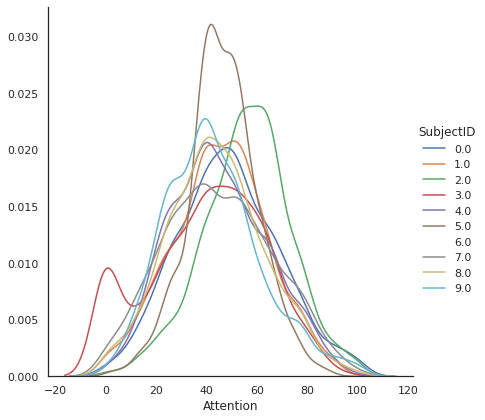

In [ ]:
sns.FacetGrid(df, hue="SubjectID", size=6) \
   .map(sns.kdeplot, "Attention") \
   .add_legend()

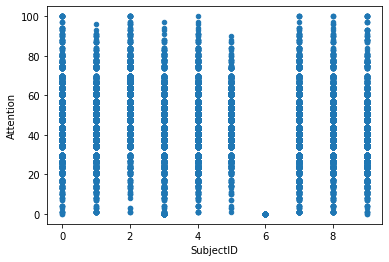

In [ ]:
df.plot(kind="scatter", x="SubjectID", y="Attention")

In [ ]:
list(df)

['SubjectID',
 'VideoID',
 'Attention',
 'Mediation',
 'Raw',
 'Delta',
 'Theta',
 'Alpha1',
 'Alpha2',
 'Beta1',
 'Beta2',
 'Gamma1',
 'Gamma2',
 'predefinedlabel',
 'user-definedlabeln']

In [ ]:
print(df) 

       SubjectID  VideoID  ...  predefinedlabel  user-definedlabeln
0            0.0      0.0  ...              0.0                 0.0
1            0.0      0.0  ...              0.0                 0.0
2            0.0      0.0  ...              0.0                 0.0
3            0.0      0.0  ...              0.0                 0.0
4            0.0      0.0  ...              0.0                 0.0
...          ...      ...  ...              ...                 ...
12806        9.0      9.0  ...              1.0                 0.0
12807        9.0      9.0  ...              1.0                 0.0
12808        9.0      9.0  ...              1.0                 0.0
12809        9.0      9.0  ...              1.0                 0.0
12810        9.0      9.0  ...              1.0                 0.0

[12811 rows x 15 columns]


In [ ]:
print(df.to_string()) 

In [ ]:
X = df.iloc[:, 2:13]

In [ ]:
X.shape

(12811, 12)

In [ ]:
X

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0
1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0
2,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0
3,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0
4,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0
...,...,...,...,...,...,...,...,...,...,...,...
12806,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0
12807,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0
12808,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0
12809,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0


In [ ]:
y1 = df.iloc[:, 13]
y = y1
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12806    1.0
12807    1.0
12808    1.0
12809    1.0
12810    1.0
Name: predefinedlabel, Length: 12811, dtype: float64

In [ ]:
y2 = df.iloc[:, 14]
y2

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12806    0.0
12807    0.0
12808    0.0
12809    0.0
12810    0.0
Name: user-definedlabeln, Length: 12811, dtype: float64

In [ ]:
y = y1

In [ ]:
import numpy as np

sub0 = df[ df['SubjectID'] == 0.0]

time_stamp = np.arange(start=0, stop=sub0.shape[0], step=1)
time_stamp.shape

import matplotlib.pyplot as plt
plt.plot(time_stamp, sub0["Raw"])

plt.plot(time_stamp[:100], sub0["Raw"][:100])

plt.plot(time_stamp[:100], sub0["Delta"][:100])

In [ ]:
import csv
import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, y_train.shape
X_test.shape, y_test.shape
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test)

In [ ]:
    model = Sequential()
    batch_size = 20
    #model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length, dropout=0.2))
    #model.add(Dropout(0.2))
    model.add(BatchNormalization(input_shape=(112,12),mode =0,axis=2))
    model.add(LSTM(100, return_sequences=False, input_shape=(112,12)))
    #model.add(Dropout(0.2))
    #model.add(LSTM(200, return_sequences = False, input_length=1024))
    model.add(Dense(112, activation='hard_sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['binary_accuracy'])